In [64]:
import numpy as np

In [65]:
import pandas as pd

In [66]:
import matplotlib.pyplot as plt

In [67]:
import shapely.geometry

In [68]:
import shapely.wkt

In [69]:
import geopandas as gpd

In [70]:
import rasterio

In [71]:
from rasterio.plot import show

In [72]:
import rasterstats

In [73]:
islands = gpd.read_file('ne_10m_minor_islands_coastline.shp', encoding='utf-8')
islands

,featurecla,min_zoom,scalerank,geometry
0,Minor coastline,6.5,7,"LINESTRING (168.20460 -76.06341, 168.28175 -76..."
1,Minor coastline,6.5,7,"LINESTRING (-68.70861 -56.52345, -68.70954 -56..."
2,Minor coastline,6.5,7,"LINESTRING (-68.70360 -56.51442, -68.71105 -56..."
3,Minor coastline,6.5,8,"LINESTRING (-59.20238 -52.90244, -59.19591 -52..."
4,Minor coastline,7.0,8,"LINESTRING (-74.53359 -52.45612, -74.50559 -52..."
...,...,...,...,...
2736,Minor coastline,7.0,8,"LINESTRING (172.05644 -22.39463, 172.05433 -22..."
2737,Minor coastline,7.0,8,"LINESTRING (171.34060 -22.34476, 171.33902 -22..."
2738,Minor coastline,7.0,8,"LINESTRING (117.75389 15.15437, 117.75186 15.1..."
2739,Minor coastline,6.5,7,"LINESTRING (43.14024 12.72015, 43.13857 12.718..."


In [74]:
islands.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

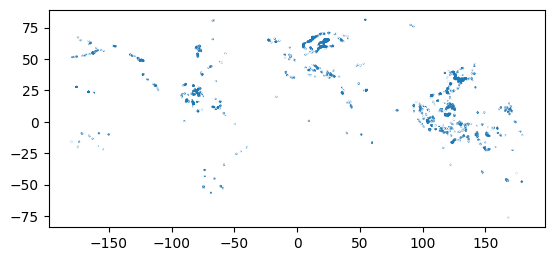

In [75]:
islands.plot();

Exercise 1: Use the scalerank column for an attribute-specific mapping, to show the colorbar you need, legend=True, add title and x and y label, in adition try to add a title to your colorbar.

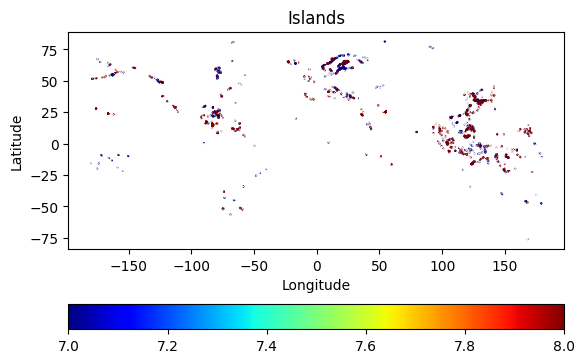

In [76]:
islands.plot(column= 'scalerank', cmap='jet', legend=True, legend_kwds={'orientation': 'horizontal'});
plt.title('Islands')
plt.xlabel('Longitude')
plt.ylabel('Latitude');

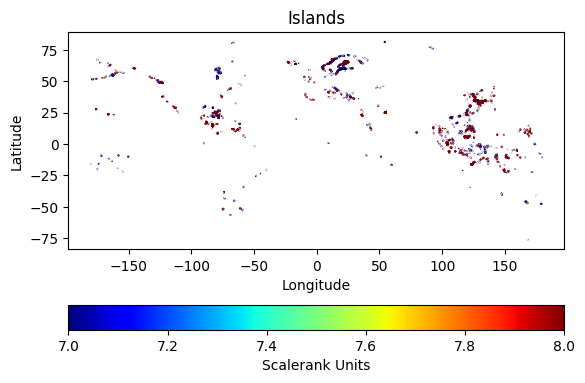

In [77]:
fig, ax = plt.subplots()
islands.plot(ax=ax, column='scalerank', cmap='jet')
plt.title('Islands')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
mappable = ax.collections[0]
cbar = fig.colorbar(mappable, ax=ax, orientation='horizontal')
cbar.set_label('Scalerank Units')
plt.show()

In [78]:
islands_repro = islands.to_crs('EPSG:3857') 

In [79]:
islands_repro.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

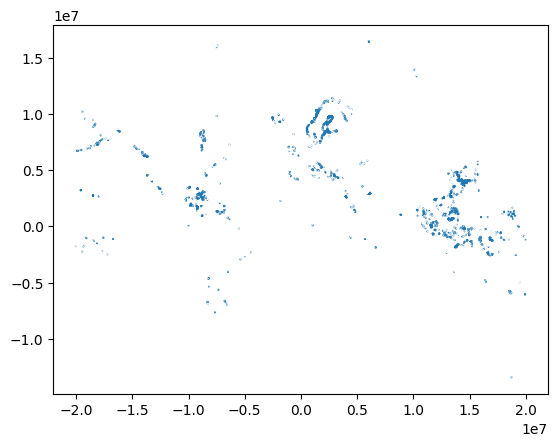

In [80]:
islands_repro.plot();

In [81]:
translated_islands = islands.translate(xoff=10, yoff=10)
rotated_islands = islands.rotate(angle=30, origin='centroid')
scaled_islands = islands.scale(xfact=0.5, yfact=1.5, origin=(0, 0))

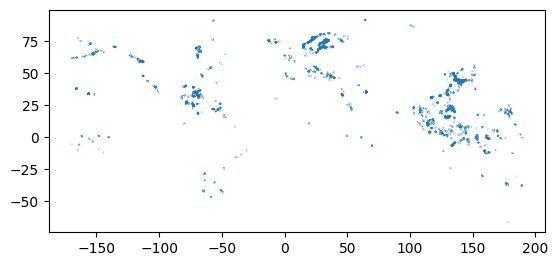

In [82]:
translated_islands.plot();

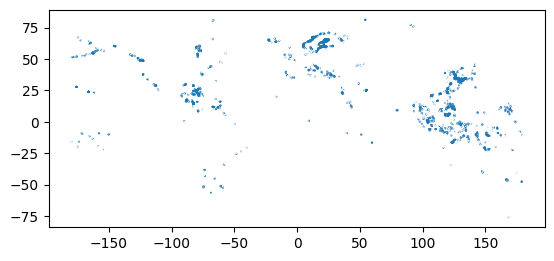

In [83]:
rotated_islands.plot();

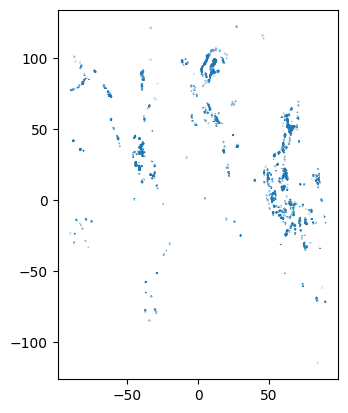

In [84]:
scaled_islands.plot();

Exercise 2: Plot the comparison btw the original islands (in blue) with the scaled islands (in red)

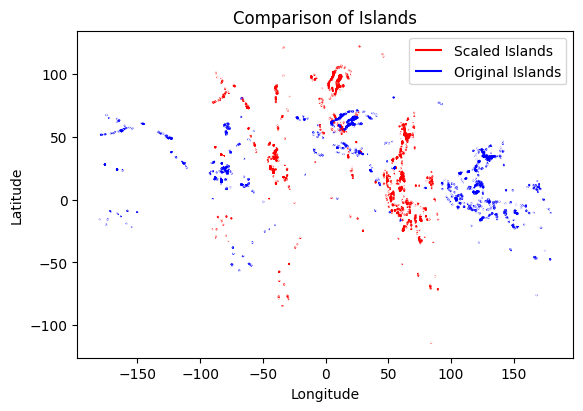

In [85]:
fig, ax = plt.subplots()
scaled_islands.plot(ax=ax, color='red', label='Scaled Islands')
islands.plot(ax=ax, color='blue', label='Original Islands')
plt.legend()

plt.title('Comparison of Islands')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()

In [86]:
## raster

In [87]:
rel = rasterio.open('SR_50M.tif', 'r')
rel

<open DatasetReader name='SR_50M.tif' mode='r'>

In [88]:
rel.name

'SR_50M.tif'

In [89]:
rel.meta

{'driver': 'GTiff',
 'dtype': 'uint8',
 'nodata': None,
 'width': 10800,
 'height': 5400,
 'count': 1,
 'crs': CRS.from_epsg(4326),
 'transform': Affine(0.03333333333333, 0.0, -179.99999999999997,
        0.0, -0.03333333333333, 90.0)}

In [90]:
rel.count

1

In [91]:
rel.height

5400

In [92]:
rel.width

10800

In [93]:
rel.crs

CRS.from_epsg(4326)

In [94]:
rel.bounds

BoundingBox(left=-179.99999999999997, bottom=-89.99999999998201, right=179.99999999996405, top=90.0)

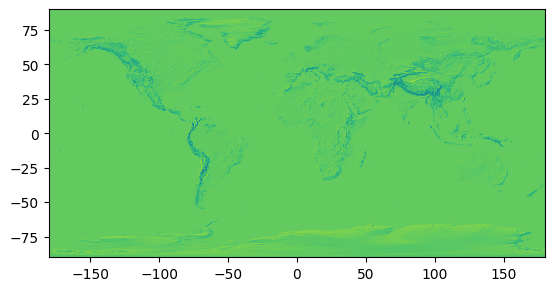

In [95]:
show(rel);

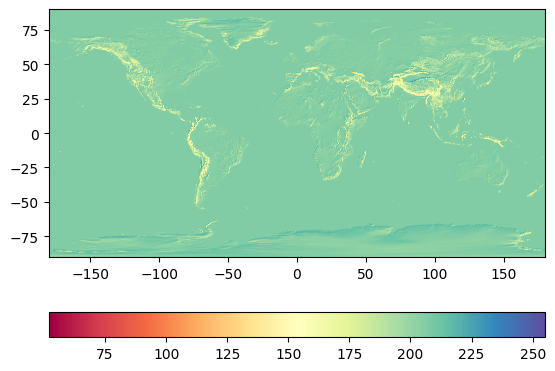

In [96]:
fig, ax = plt.subplots()
rel_new = ax.imshow(rel.read(1, masked=True), cmap='Spectral')
fig.colorbar(rel_new, ax=ax, orientation='horizontal')
show(rel, ax=ax, cmap='Spectral');

In [97]:
meta = rel.meta
meta.update(height=3600)
meta.update(width=7200)
with rasterio.open('updated_raster.tif', 'w', **meta) as dst:
     dst.write(rel.read())

In [98]:
dst = rasterio.open('updated_raster.tif', 'r')
dst

<open DatasetReader name='updated_raster.tif' mode='r'>

In [99]:
dst.meta

{'driver': 'GTiff',
 'dtype': 'uint8',
 'nodata': None,
 'width': 7200,
 'height': 3600,
 'count': 1,
 'crs': CRS.from_epsg(4326),
 'transform': Affine(0.03333333333333, 0.0, -179.99999999999997,
        0.0, -0.03333333333333, 90.0)}

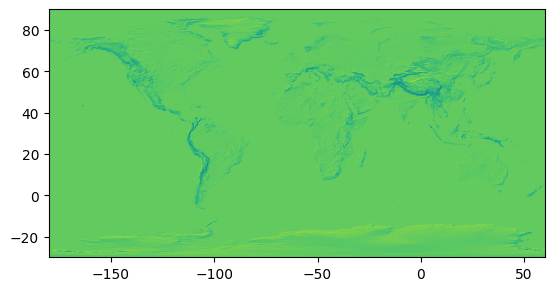

In [100]:
show(dst);

Exercise 3: modify the transform of the dst map to align it with the coordinate system of the rel file, which spans from -90 to 90 on the y-axis and -180 to 180 on the x-axis

In [101]:
meta = rel.meta
meta.update(height=3600)
meta.update(width=7200)
meta.update(transform=(0.05, 0, -180, 0, -0.05, 90.0))
with rasterio.open('updatednew_raster.tif', 'w', **meta) as dst:
     dst.write(rel.read())

In [102]:
dst = rasterio.open('updatednew_raster.tif', 'r')
dst

<open DatasetReader name='updatednew_raster.tif' mode='r'>

In [103]:
dst.meta

{'driver': 'GTiff',
 'dtype': 'uint8',
 'nodata': None,
 'width': 7200,
 'height': 3600,
 'count': 1,
 'crs': CRS.from_epsg(4326),
 'transform': Affine(0.05, 0.0, -180.0,
        0.0, -0.05, 90.0)}

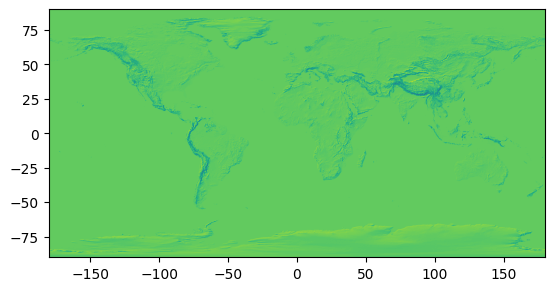

In [104]:
show(dst);

Exercise 4: modify the crs of the rel map to epsg(3857) (rasterio.crs is the function) and write the file to a new file.

In [105]:
meta = rel.meta
meta.update(crs=rasterio.crs.CRS.from_epsg(3857))
with rasterio.open('updatednewnew_raster.tif', 'w', **meta) as g:
     g.write(rel.read())

In [106]:
g.meta

{'driver': 'GTiff',
 'dtype': 'uint8',
 'nodata': None,
 'width': 10800,
 'height': 5400,
 'count': 1,
 'crs': CRS.from_epsg(3857),
 'transform': Affine(0.03333333333333, 0.0, -179.99999999999997,
        0.0, -0.03333333333333, 90.0)}

In [107]:
f = rasterio.open("updatednewnew_raster.tif")
f = f.read()

In [108]:
np.min(f)

52

In [109]:
np.max(f)

255

In [110]:
f.shape

(1, 5400, 10800)

In [111]:
f

array([[[204, 206, 206, ..., 206, 206, 204],
        [206, 206, 206, ..., 206, 206, 206],
        [206, 206, 206, ..., 206, 206, 206],
        ...,
        [206, 205, 205, ..., 206, 205, 206],
        [202, 202, 202, ..., 204, 203, 201],
        [197, 202, 201, ..., 201, 201, 198]]], dtype=uint8)

In [112]:
f = f / 10
f

array([[[20.4, 20.6, 20.6, ..., 20.6, 20.6, 20.4],
        [20.6, 20.6, 20.6, ..., 20.6, 20.6, 20.6],
        [20.6, 20.6, 20.6, ..., 20.6, 20.6, 20.6],
        ...,
        [20.6, 20.5, 20.5, ..., 20.6, 20.5, 20.6],
        [20.2, 20.2, 20.2, ..., 20.4, 20.3, 20.1],
        [19.7, 20.2, 20.1, ..., 20.1, 20.1, 19.8]]])

Exercise 5: plot the Relief map again and add the islands to your figure. Add colorbar and with a title

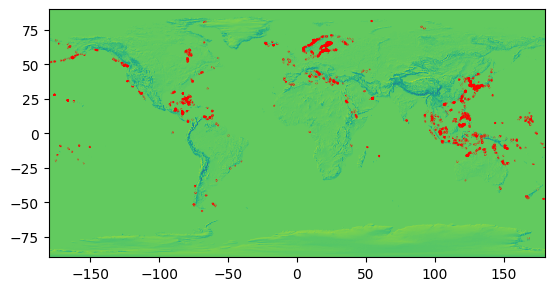

In [124]:
fig, ax = plt.subplots()
show(rel, ax=ax)
islands.plot(ax=ax,color='red');

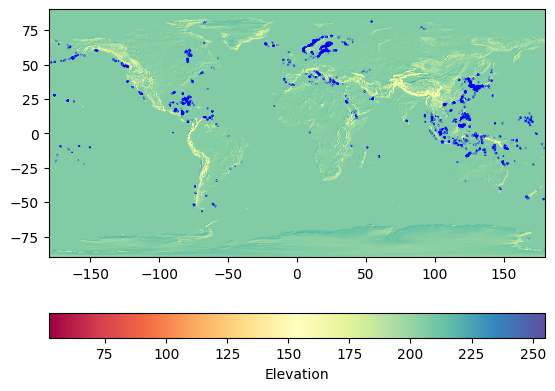

In [129]:
fig, ax = plt.subplots()
rel_new = ax.imshow(rel.read(1, masked=True), cmap='Spectral')
islands.plot(ax=ax,color='blue')
cbar = fig.colorbar(rel_new, ax=ax, orientation='horizontal')
cbar.set_label('Elevation')
show(rel, ax=ax, cmap='Spectral');

Reference: https://jupyter.org https://the-turing-way.netlify.app/communication/binder/zero-to-binder.html https://docs.python.org https://geobgu.xyz/py/ https://www.naturalearthdata.com/